In [38]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AhMeD_RaFiQuE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AhMeD_RaFiQuE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
df = pd.read_csv("all-data.csv", encoding='latin1')
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [26]:
df.describe()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [41]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))  # Get English stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(filtered_tokens)  # Join tokens back into a string

In [42]:
df['cleaned_text'] = df['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'].apply(preprocess_text)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['neutral'], test_size=0.2, random_state=42)


In [44]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [56]:
# Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression()

In [57]:
logistic_y_pred = logistic_classifier.predict(X_test_tfidf)
logistic_y_pred

array(['neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'negative',
       'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'negative', 'neutral', 'positive',
       'negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'positive', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'positive', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neu

In [50]:
logistic_classifier.score(X_train_tfidf, y_train)

0.8609391124871001

In [58]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [59]:
nb_y_pred = nb_classifier.predict(X_test_tfidf)
nb_y_pred

array(['neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive',
       'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'positive',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', '

In [60]:
nb_classifier.score(X_train_tfidf, y_train)

0.7450980392156863

In [61]:
# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)


SVC()

In [62]:
svm_y_pred = svm_classifier.predict(X_test_tfidf)
svm_y_pred

array(['neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'negative', 'neutral', 'positive',
       'negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'positive', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutra

In [63]:
svm_classifier.score(X_train_tfidf, y_train)

0.9744582043343654

In [65]:
# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)


RandomForestClassifier()

In [66]:
rf_y_pred = rf_classifier.predict(X_test_tfidf)
rf_y_pred

array(['neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'positive',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'negative', 'neutral', 'positive', 'neutral', 'neutral',
       'positive', 'positive', 'neutral', 'negative', 'neutral',
       'positive', 'negative', 'neutral', 'negative', 'neutral',
       'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neu

In [67]:
rf_classifier.score(X_train_tfidf, y_train)

0.9992260061919505

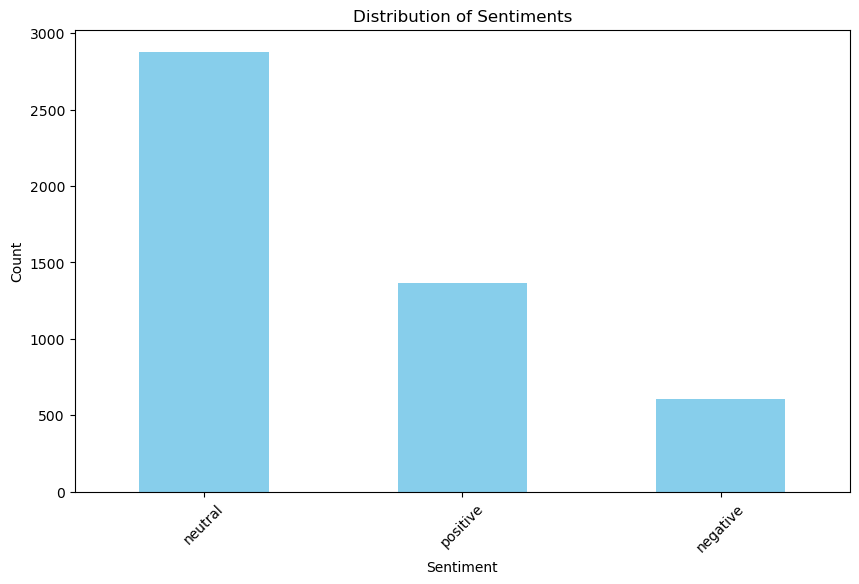

In [68]:

# Distribution of sentiments in the dataset
plt.figure(figsize=(10, 6))
df['neutral'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

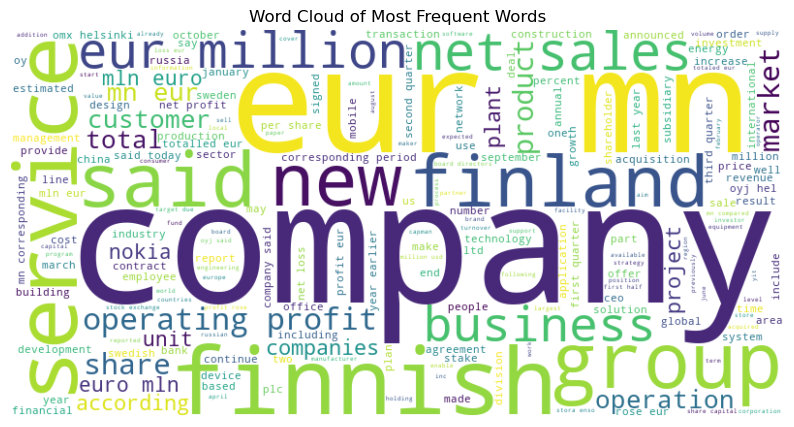

In [69]:
# Word cloud of most frequent words
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words')
plt.axis('off')
plt.show()